In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import BSpline, splev, interp1d
plt.rcParams['font.size'] = 10.5

In [2]:
def getH(x):
    """Computes the Hubble parameter H given some x"""
    return H0*np.sqrt((Ωb + Ωm)*np.exp(-3.0*x) + Ωr*np.exp(-4.0*x) + ΩΛ)

def getHPrime(x):
    """Function for H prime e.g. H' = aH"""
    return H0*np.sqrt((Ωb + Ωm)*np.exp(-x) + Ωr*np.exp(-2.0*x) + ΩΛ*np.exp(2.0*x))

def getdHPrime(x):
    return .5*H0*np.exp(x)*(-(Ωb + Ωm)*np.exp(2.0*x) - 2.0*Ωr*np.exp(-3.0*x) + 2.0*ΩΛ*np.exp(x))/np.sqrt( ((Ωb + Ωm)/np.exp(x)) + Ωr*np.exp(-2.0*x) + ΩΛ*np.exp(2.0*x))

def ηDeriv(t, x):
    """Called by odeint when solving for the conformal time eta"""
    return c/getHPrime(x)

def getη(x):
    """Interpolates a value from the differential equation
     solution η using values from the x_grid array"""
    return η_spline(x)

def getΩb(x):
    """Computes the value of the baryon density parameter (omega_b) at some x"""
    return Ωb*np.exp(-3.0*x)*((H0/getH(x))**2.0)

def getΩm(x):
    """Computes the dark matter density parameter (omega_m) at x"""
    return Ωm*np.exp(-3.0*x)*((H0/getH(x))**2.0)

def getΩr(x):
    """Computes radiation density (omega_r) at x"""
    return Ωr*np.exp(-4.0*x)*((H0/getH(x))**2.0)

def getΩΛ(x):
    """Computes the dark energy parameter (omega_lambda) at x;
     it is the difference between 1 and the sum of the other parameters"""
    return 1.0 - (getΩb(x) + getΩm(x) + getΩr(x))

In [3]:
Mpc = 3.08568025e22
h0 = .7
H0 = h0*100.0*1.0e3/Mpc
c  = 2.99792458e8

Ωb = .046
Ωm = .224
Ωr = 8.3e-5
ΩΛ = 1.0 - Ωb - Ωm - Ωr

spline_order = 3

In [12]:
n1 = 200
n2 = 300
n_t = 500

z_start_rec = 1630.4
z_end_rec = 614.2
z_end = 0.0

x_start_rec = -math.log(z_start_rec + 1.0)
x_end_rec = -math.log(z_end_rec + 1.0)
x_end = 0.0

n_eta = 1000
a_init = 1.0e-10
x_eta_init = math.log(a_init)
x_eta_end = 0.0

x_t = np.zeros(n_t)
dx = (x_end_rec - x_start_rec)/(n1 - 1.0)
for i in range(n1):
    x_t[i] = x_start_rec + (i - 1.0)*dx
    
#x_rec = np.linspace(x_start_rec, x_end_rec, n1)

dx = (x_end - x_end_rec)/n2
for i in range(n2):
    x_t[n1 + i] = x_end_rec + i*dx
#x_after = np.linspace(x_end_rec, x_end, n2, endpoint=True)

#x_t = np.concatenate((x_rec, x_after), axis=0)

x_eta = np.linspace(x_eta_init, x_eta_end, n_eta, endpoint=True)
η_ini = c*a_init/(H0*math.sqrt(Ωr))
η = odeint(ηDeriv, η_ini, x_eta)

η_spline = BSpline(x_eta, η, k=spline_order)

η_grid = np.zeros(n_eta)
hubble = np.zeros(n_eta)
hubblep = np.zeros(n_eta)
Ωb_grid = np.zeros(n_eta)
Ωm_grid = np.zeros(n_eta)
Ωr_grid = np.zeros(n_eta)
ΩΛ_grid = np.zeros(n_eta)

for i in range(n_eta):
    η_grid[i] = getη(x_eta[i])
    hubble[i] = getH(x_eta[i])
    hubblep[i] = getHPrime(x_eta[i])
    Ωb_grid[i] = getΩb(x_eta[i])
    Ωm_grid[i] = getΩm(x_eta[i])
    Ωr_grid[i] = getΩr(x_eta[i])
    ΩΛ_grid[i] = getΩΛ(x_eta[i])

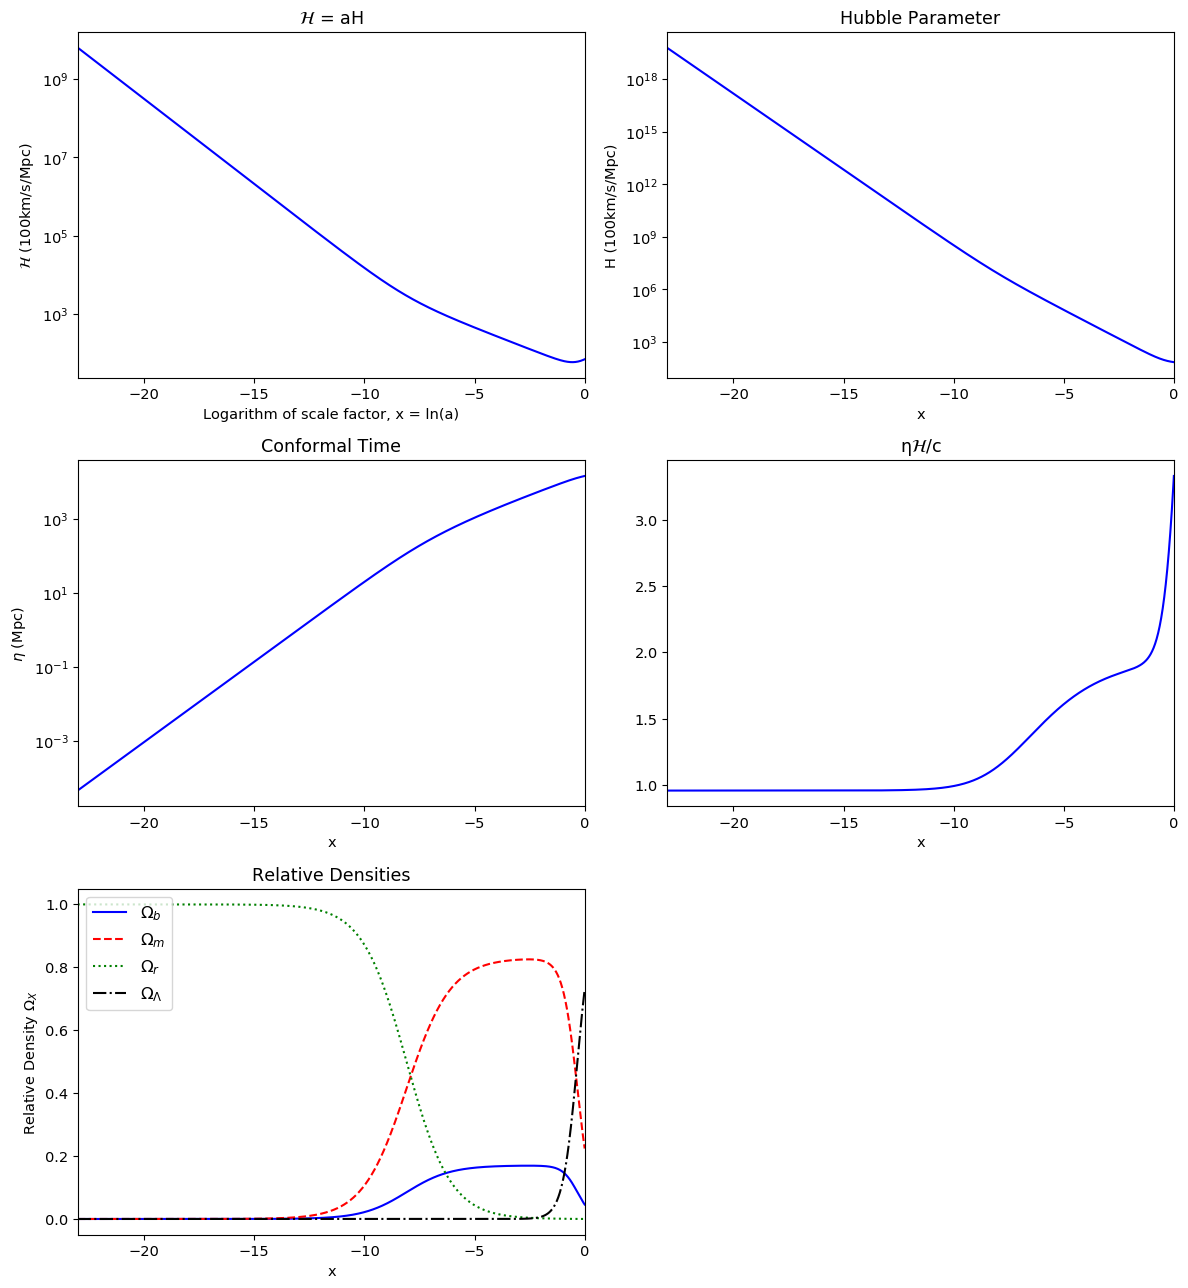

In [5]:
'''
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 13), dpi=100)

axs[0, 0].plot(x_eta, hubblep*Mpc/1.0e3, 'b')
axs[0, 0].set_xlim(-23, 0)
#axs[0, 0].set_ylim(1.0e-1, 1.0e4)
axs[0, 0].set_yscale('log')
axs[0, 0].set_title('$\mathcal{H}$ = aH')
axs[0, 0].set_xlabel('Logarithm of scale factor, x = ln(a)')
axs[0, 0].set_ylabel('$\mathcal{H}$ (100km/s/Mpc)')


axs[0, 1].plot(x_eta, hubble*Mpc/1.0e3, 'b')
axs[0, 1].set_xlim(-23, 0)
#axs[0, 1].set_ylim(1.0e-1, 1.0e9)
axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Hubble Parameter')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('H (100km/s/Mpc)')


axs[1, 0].plot(x_eta, η_grid/Mpc, 'b')
axs[1, 0].set_xlim(-23, 0)
#axs[1, 0].set_ylim(1.0e0, 1.0e5)
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Conformal Time')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel("$\eta$ (Mpc)")


axs[1, 1].plot(x_eta, η_grid*hubblep/c, 'b')
axs[1, 1].set_xlim(-23, 0)
#axs[1,1].set_ylim(.85, 3.3)
axs[1, 1].set_title('η$\mathcal{H}$/c')
axs[1, 1].set_xlabel('x')


axs[2, 0].plot(x_eta, Ωb_grid, color='blue')
axs[2, 0].plot(x_eta, Ωm_grid, ls='--', color='red')
axs[2, 0].plot(x_eta, Ωr_grid, ls=':', color='green')
axs[2, 0].plot(x_eta, ΩΛ_grid, ls='-.', color='black')
axs[2, 0].set_xlim(-23, 0.0)
#axs[2, 0].set_ylim(0.0, 1.1)
axs[2, 0].set_title('Relative Densities')
axs[2, 0].set_xlabel('x')
axs[2, 0].set_ylabel('Relative Density $\Omega_X$')
axs[2, 0].legend(['$\Omega_b$', '$\Omega_m$', '$\Omega_r$', '$\Omega_\Lambda$'], loc='upper left', prop={'size':12})


axs[2, 1].remove()

fig.tight_layout()
#plt.savefig('background-cosmology')
plt.show()
'''